In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
zero = np.zeros((100,100))

In [3]:
# df = pd.read_csv('csv_results/result_16.csv')
# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv('conjecture_results/result_1.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,Test,True,ARMA,ARMA_Order,ARMA_Train_loss,ARMA_Valid_loss,AR,AR_Order,Informer,Informer_para,Informer_lr,RNN
0,3,"[-0.480500230327959, -0.10288974808592663, -0....","[-0.6332714291518686, -0.16386451575202474, -0...","[-0.5729117102479617, -0.44939124235467914, -0...","(1, 0, 2)",11.960407,1.150646,"[-0.6129359458612192, -0.4425314141150207, -0....","(3, 0, 0)","[0.24835790693759918, 0.2622656226158142, 0.32...","(10, 2)",0.0100,"[-0.2508357763290405, -0.2184595763683319, -0...."
1,1,"[0.23722607578487998, -0.6118774781293821, -1....","[0.07559133743852942, 0.19943040706561527, -0....","[-0.024261367959792196, 0.18128407216029996, -...","(3, 0, 0)",11.999328,1.110553,"[-0.024261367959792196, 0.18128407216029996, -...","(3, 0, 0)","[0.47779589891433716, 0.4957389235496521, 0.16...","(50, 10)",0.0010,"[0.15575683116912842, 0.40849828720092773, -0...."
2,7,"[1.6965503028701905, 0.9478592069256347, 0.778...","[1.1192989915324705, 1.136900807103955, 0.3794...","[1.4072986876759968, 1.5602807361719615, 1.188...","(1, 0, 1)",12.522450,0.708499,"[1.3849332081139343, 1.5440908250004803, 1.188...","(4, 0, 0)","[1.0812139511108398, 3.0325136184692383, 2.657...","(20, 4)",0.0010,"[1.2251042127609253, 1.2885724306106567, 0.477..."
3,4,"[0.738707960379525, 0.3575563661975284, 0.2155...","[0.11702006471055498, 0.6801979280242475, 0.01...","[0.726832070567021, 0.6786923938952069, 0.4733...","(1, 0, 2)",10.288098,860.722011,"[0.5020895880449809, 0.7202106845280716, 0.348...","(1, 0, 0)","[-0.13709327578544617, 0.04928620904684067, 0....","(50, 10)",0.0001,"[0.618128776550293, 0.7331093549728394, 0.5106..."
4,5,"[0.3315127974901487, -0.028278250345896316, 0....","[-0.2550283840928068, 0.45902698953655213, -0....","[0.3064416989073362, 0.3172144131932905, 0.126...","(1, 0, 1)",11.915144,0.811533,"[0.26923848345577, 0.35022186806509004, 0.1608...","(4, 0, 0)","[-0.39967450499534607, -0.1183989942073822, -0...","(10, 2)",0.0010,"[0.1496063768863678, 0.2820464074611664, -0.13..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,79,"[1.1044995905575932, 1.591033060666286, 1.7694...","[0.23747000180498834, 0.985764589655099, 1.098...","[1.4548107931881997, 1.2344501554735168, 1.434...","(1, 0, 1)",9.589454,24.185846,"[1.3626359528557277, 1.0430975798563016, 1.409...","(2, 0, 0)","[8.634204864501953, 3.0612335205078125, 8.0451...","(20, 4)",0.0001,"[1.2820701599121094, 0.9358392357826233, 0.788..."
96,95,"[-0.9013235706496914, -1.4951671138239895, -0....","[0.02833873112210733, -0.915492936210745, -1.0...","[0.8799372631197117, -0.33384798148331485, -1....","(1, 0, 2)",8.714057,107.469008,"[0.5428726021034311, -0.8844111477350382, -1.4...","(1, 0, 0)","[-0.6136824488639832, -0.8855911493301392, -1....","(20, 4)",0.0010,"[0.07425494492053986, -1.153946876525879, -0.9..."
97,84,"[0.6491428260319387, 1.277981945135682, 1.7633...","[-0.26191787774437447, 0.780101764904126, 0.88...","[0.1604122303066886, 0.5367301341499217, 1.035...","(2, 0, 1)",7.483558,467.238523,"[0.1885707837609878, 0.5013123910693065, 1.048...","(3, 0, 0)","[-0.7965611219406128, -0.48205190896987915, -0...","(20, 4)",0.0010,"[0.11794161796569824, 0.8272120952606201, 1.25..."
98,94,"[-1.42837961176336, -0.520861458911617, -0.790...","[-0.8944770095813953, -0.9811411069726623, -0....","[-0.7999373767495952, -1.211846356336021, -0.7...","(2, 0, 2)",9.977133,81.864897,"[-0.8537352726855206, -1.2496832755067964, -0....","(2, 0, 0)","[-0.5518868565559387, -0.7762284874916077, -0....","(10, 2)",0.0010,"[-0.6364280581474304, -0.7993429899215698, 0.3..."


In [4]:
# ar_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# ar_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [5]:
# zero_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')
# zero_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')

In [6]:
informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [7]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_lr_select = np.array(df['Informer_lr'].to_list())
informer_select

array([10, 50, 20, 50, 10, 10, 50, 10, 10, 20, 10, 20, 10, 10, 50, 20, 10,
       50, 50, 50, 20, 10, 10, 50, 20, 10, 50, 20, 50, 10, 20, 10, 50, 50,
       10, 50, 10, 10, 20, 50, 20, 50, 10, 10, 10, 20, 50, 50, 10, 20, 50,
       10, 20, 20, 50, 20, 10, 20, 50, 20, 50, 50, 20, 50, 20, 10, 50, 20,
       10, 10, 10, 20, 10, 20, 20, 20, 20, 10, 50, 20, 10, 20, 10, 10, 20,
       50, 10, 10, 10, 20, 50, 20, 50, 10, 10, 20, 20, 20, 10, 20])

In [8]:
informer_lr_select

array([0.01  , 0.001 , 0.001 , 0.0001, 0.001 , 0.0001, 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.01  , 0.001 , 0.0001, 0.0001, 0.0001,
       0.001 , 0.001 , 0.0001, 0.001 , 0.001 , 0.001 , 0.0001, 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.0001, 0.001 ,
       0.0001, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.0001, 0.0001, 0.001 ,
       0.001 , 0.001 , 0.0001, 0.001 , 0.001 , 0.0001, 0.001 , 0.001 ,
       0.001 , 0.001 , 0.001 , 0.0001, 0.001 , 0.001 , 0.001 , 0.0001,
       0.0001, 0.001 , 0.0001, 0.001 , 0.001 , 0.0001, 0.001 , 0.0001,
       0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.0001, 0.001 ,
       0.0001, 0.001 , 0.0001, 0.001 , 0.001 , 0.001 , 0.01  , 0.0001,
       0.001 , 0.001 , 0.001 , 0.01  , 0.001 , 0.0001, 0.001 , 0.0001,
       0.001 , 0.001 , 0.001 , 0.001 ])

In [9]:


# Plotting the array
plt.figure(figsize=(100, 100))
# plt.plot(zero_mse,label = 'Zero', marker='o')
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


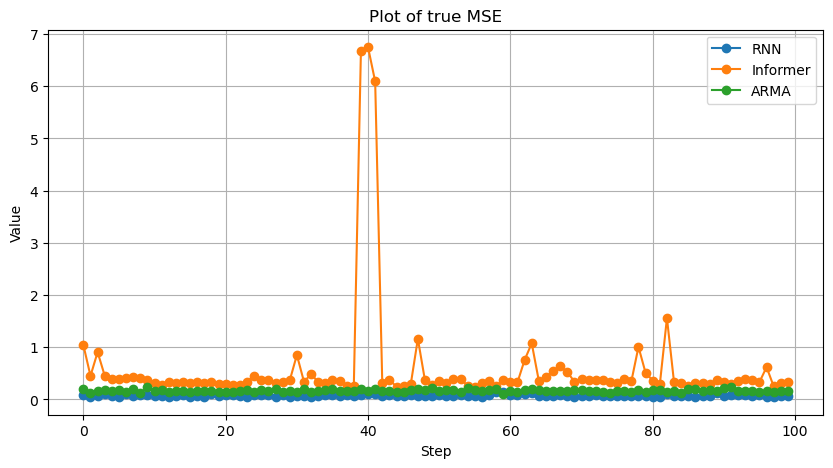

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
# plt.plot(zero_mse_true,label = 'Zero', marker='o')
plt.plot(rnn_mse_true,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse_true,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
mean_rnn_mse_true = np.mean(rnn_mse_true)
mean_informer_mse_true = np.mean(informer_mse_true)
mean_arma_mse_true = np.mean(arma_mse_true)
(mean_rnn_mse_true,mean_informer_mse_true,mean_arma_mse_true)

(0.07342616063817281, 0.5914821699107506, 0.16817574623911202)

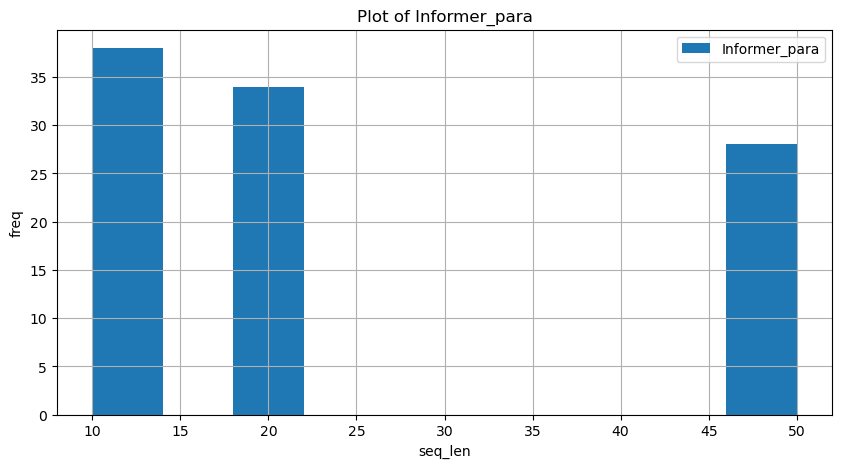

In [11]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of Informer_para')
plt.xlabel('seq_len')
plt.ylabel('freq')
plt.grid(True)
plt.legend()
plt.show()

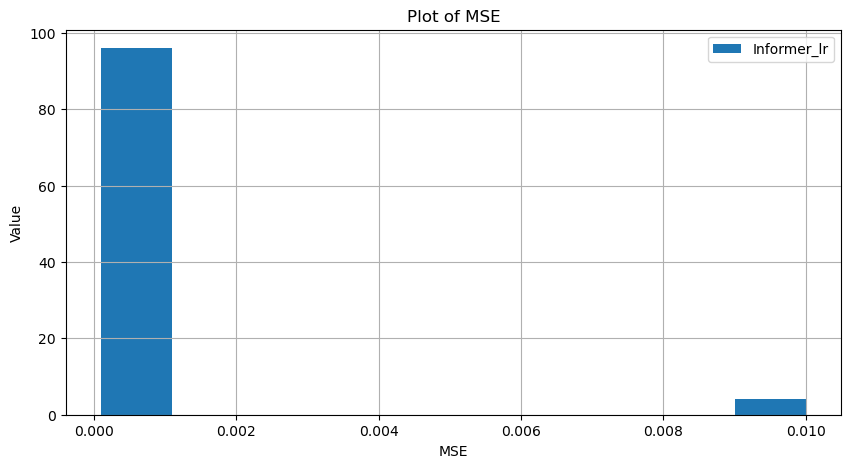

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(informer_lr_select,label = 'Informer_lr')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()